# Perceptron Learning Rule

### Imports

In [1]:
# Necessities
import numpy as np
import matplotlib.pyplot as plt

# Dataset
import opendatasets as od
import pandas as pd
from sklearn.model_selection import train_test_split

### Dataset load and exploration

In [2]:
#  Download fresh dataset from Kaggle

# Kaggle url for UCI banknote ID dataset
#data_url = "https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data"

# Download
#od.download(data_url)


In [3]:
# Load data from directory
data_dir = "./datasets/"
data_name = "BankNote_Authentication.csv"

df = pd.read_csv(data_dir + data_name)

In [4]:
# Some basic metrics
print("Head and tail")
print(df.head(5)); print("\n")
print(df.tail(5)); print("\n")

print("Pandas info")
print(df.info()); print("\n")

Head and tail
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


      variance  skewness  curtosis  entropy  class
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1


Pandas info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64

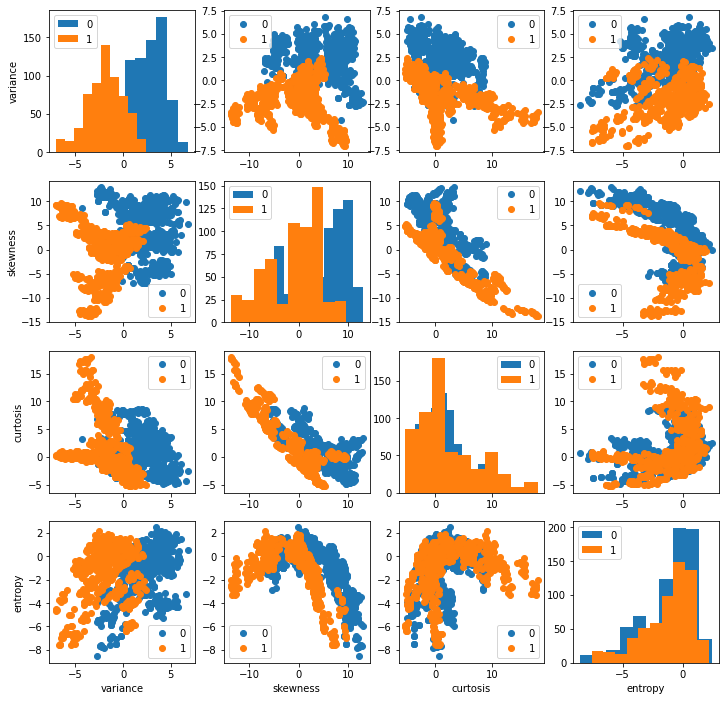

In [5]:
# Some plotting
# Group by class
grouped = df.groupby("class")


             
plt.figure(figsize=(12, 12))

plt.subplot(4, 4, 1) # histogram
for name, group in grouped:
    plt.hist(group["variance"], label=name)
plt.ylabel("variance")
plt.legend()

plt.subplot(4, 4, 2)
for name, group in grouped:
    plt.plot(group["skewness"], group["variance"], marker="o", linestyle="", label=name)
plt.legend()

plt.subplot(4, 4, 3)
for name, group in grouped:
    plt.plot(group["curtosis"], group["variance"], marker="o", linestyle="", label=name)
plt.legend()

plt.subplot(4, 4, 4)
for name, group in grouped:
    plt.plot(group["entropy"], group["variance"], marker="o", linestyle="", label=name)
plt.legend()



plt.subplot(4, 4, 5)
for name, group in grouped:
    plt.plot(group["variance"], group["skewness"], marker="o", linestyle="", label=name)
plt.ylabel("skewness")
plt.legend()

plt.subplot(4, 4, 6) # histogram
for name, group in grouped:
    plt.hist(group["skewness"], label=name)
plt.legend()

plt.subplot(4, 4, 7)
for name, group in grouped:
    plt.plot(group["curtosis"], group["skewness"], marker="o", linestyle="", label=name)
plt.legend()

plt.subplot(4, 4, 8)
for name, group in grouped:
    plt.plot(group["entropy"], group["skewness"], marker="o", linestyle="", label=name)
plt.legend()


plt.subplot(4, 4, 9)
for name, group in grouped:
    plt.plot(group["variance"], group["curtosis"], marker="o", linestyle="", label=name)
plt.ylabel("curtosis")
plt.legend()

plt.subplot(4, 4, 10)
for name, group in grouped:
    plt.plot(group["skewness"], group["curtosis"], marker="o", linestyle="", label=name)
plt.legend()

plt.subplot(4, 4, 11) # histogram
for name, group in grouped:
    plt.hist(group["curtosis"], label=name)
plt.legend()

plt.subplot(4, 4, 12)
for name, group in grouped:
    plt.plot(group["entropy"], group["curtosis"], marker="o", linestyle="", label=name)
plt.legend()



plt.subplot(4, 4, 13)
for name, group in grouped:
    plt.plot(group["variance"], group["entropy"], marker="o", linestyle="", label=name)
plt.xlabel("variance")
plt.ylabel("entropy")
plt.legend()

plt.subplot(4, 4, 14)
for name, group in grouped:
    plt.plot(group["skewness"], group["entropy"], marker="o", linestyle="", label=name)
plt.xlabel("skewness")
plt.legend()

plt.subplot(4, 4, 15)
for name, group in grouped:
    plt.plot(group["curtosis"], group["entropy"], marker="o", linestyle="", label=name)
plt.xlabel("curtosis")
plt.legend()


plt.subplot(4, 4, 16) # histogram
for name, group in grouped:
    plt.hist(group["entropy"], label=name)
plt.xlabel("entropy")
plt.legend()

### Data splitting

In [6]:
# x, y split
x = df.drop("class", axis=1)
y = df["class"]
#print("patterns\n"); print(x.head(5)); print("\n")
#print("targets\n"); print(y.head(5))

In [7]:
# train, test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

#print(x_train.info())
#print(x_train.head(5)); print("\n")
#print(y_train.head(5))

### Network Functions

In [9]:
# Activation Functions

# Hardlim
def hardLim(X):
    return np.where(X < 0, 0, 1)

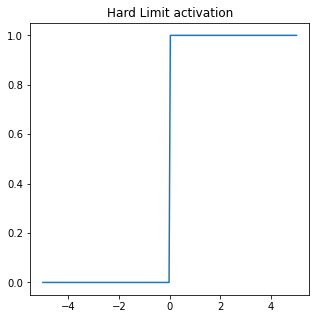

In [10]:
# visualise functions
x = np.linspace(start=-5, stop=5, num=200)

plt.figure(figsize = (5, 5))

y = hardLim(x)

plt.plot(x,y)
plt.gca().set_title("Hard Limit activation")
plt.show()

### Perceptron learning rule - 4-input single neuron

In [97]:
# Define perceptron
class perceptron():
    def __init__(self):
        self.weights = (np.dot((0.5-(-0.5)), np.random.rand(1, 4)) + (-0.5)).reshape(-1, 1)
        self.bias = 0.5
        self.f = hardLim
        self.training_record = []
        
    def feedForward(self,x):
        self.netinput = np.dot(x, self.weights) + self.bias
        activation = self.f(self.netinput)
        return activation
                
    def runTraining(self, x_train, y_train, max_epoch):
        
        # Loop passes through entire training set
        for epoch in range(max_epoch):
            
            # Count misclassified examples 
            training_recordTemp = 0
            
            # Loop through patterns
            for i in range(len(x_train)):
                
                # Get p and t
                p = x_train.iloc[i,:].to_numpy(); t = y_train.iloc[i]
                
                # Find activation
                a = self.feedForward(p)
                
                # Find error
                e = t - a
                
                # If error is NOT zero apply weight and bias update rules
                if(e):
                    # Update training record
                    training_recordTemp += 1
                    
                    # Update w and b (according to Hagan, et al.)
                    self.weights = np.add(self.weights, (e * p).reshape(-1,1))
                    self.bias = self.bias + e
            
            # Append to training record        
            self.training_record.append(training_recordTemp) 
            
    def testNetwork(self, x_test, y_test):
        # Define output
        percentOut = 0
        
        # Loop through patterns
        for i in range(len(x_test)):
        
            # Get p and t
            p = x_test.iloc[i,:].to_numpy(); t = y_test.iloc[i]
                
            # Find activation
            a = self.feedForward(p)
            
            # Check against target
            if (a != t):
                percentOut += 1          
        
        # Convert
        percentOut = (percentOut / len(x_test)) * 100
        
        return percentOut            

In [98]:
# Create perceptron instance
banknotePerceptron = perceptron()

In [99]:
# Train banknote perceptron
banknotePerceptron.runTraining(x_train, y_train, 100)

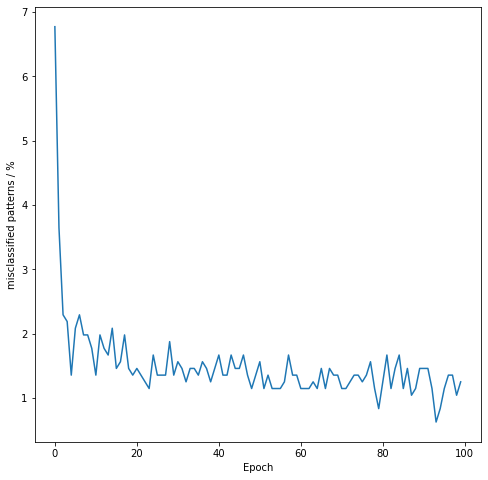

In [100]:
# Plot training record
plt.figure(figsize=(8, 8))

# Training record to percentage
scaledRecord= [(x / len(x_train))*100 for x in banknotePerceptron.training_record]

plt.plot(range(len(banknotePerceptron.training_record)),scaledRecord)
plt.gca().set_title("")
plt.xlabel("Epoch")
plt.ylabel("misclassified patterns / %")
plt.show()


In [104]:
# Test on hold-out set
test_result = banknotePerceptron.testNetwork(x_test, y_test)
print(str(test_result) + " % of patterns misclassifed")


2.1844660194174756 % of patterns misclassifed
